<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Task 1: N-Queens using Backtracking</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

**Question** 

The N-queens puzzle is a problem where one must place N-queens on an NxN chessboard such that no two queens are threatening each other. Once a queen is placed on the board no other queen can be placed in the same row, column, or diagonals. For example, a queen on the accompanying board blocks every square with a line over it.

You can try an interactive version of this problem at 4 Queens Puzzle (Brain Bashers n.d.).

Attempt to solve the 4-queens problem using backtracking. Define a state representation and actions for each state and show how backtracking maintains the state list.

Then watch the video, which will run through the solution.

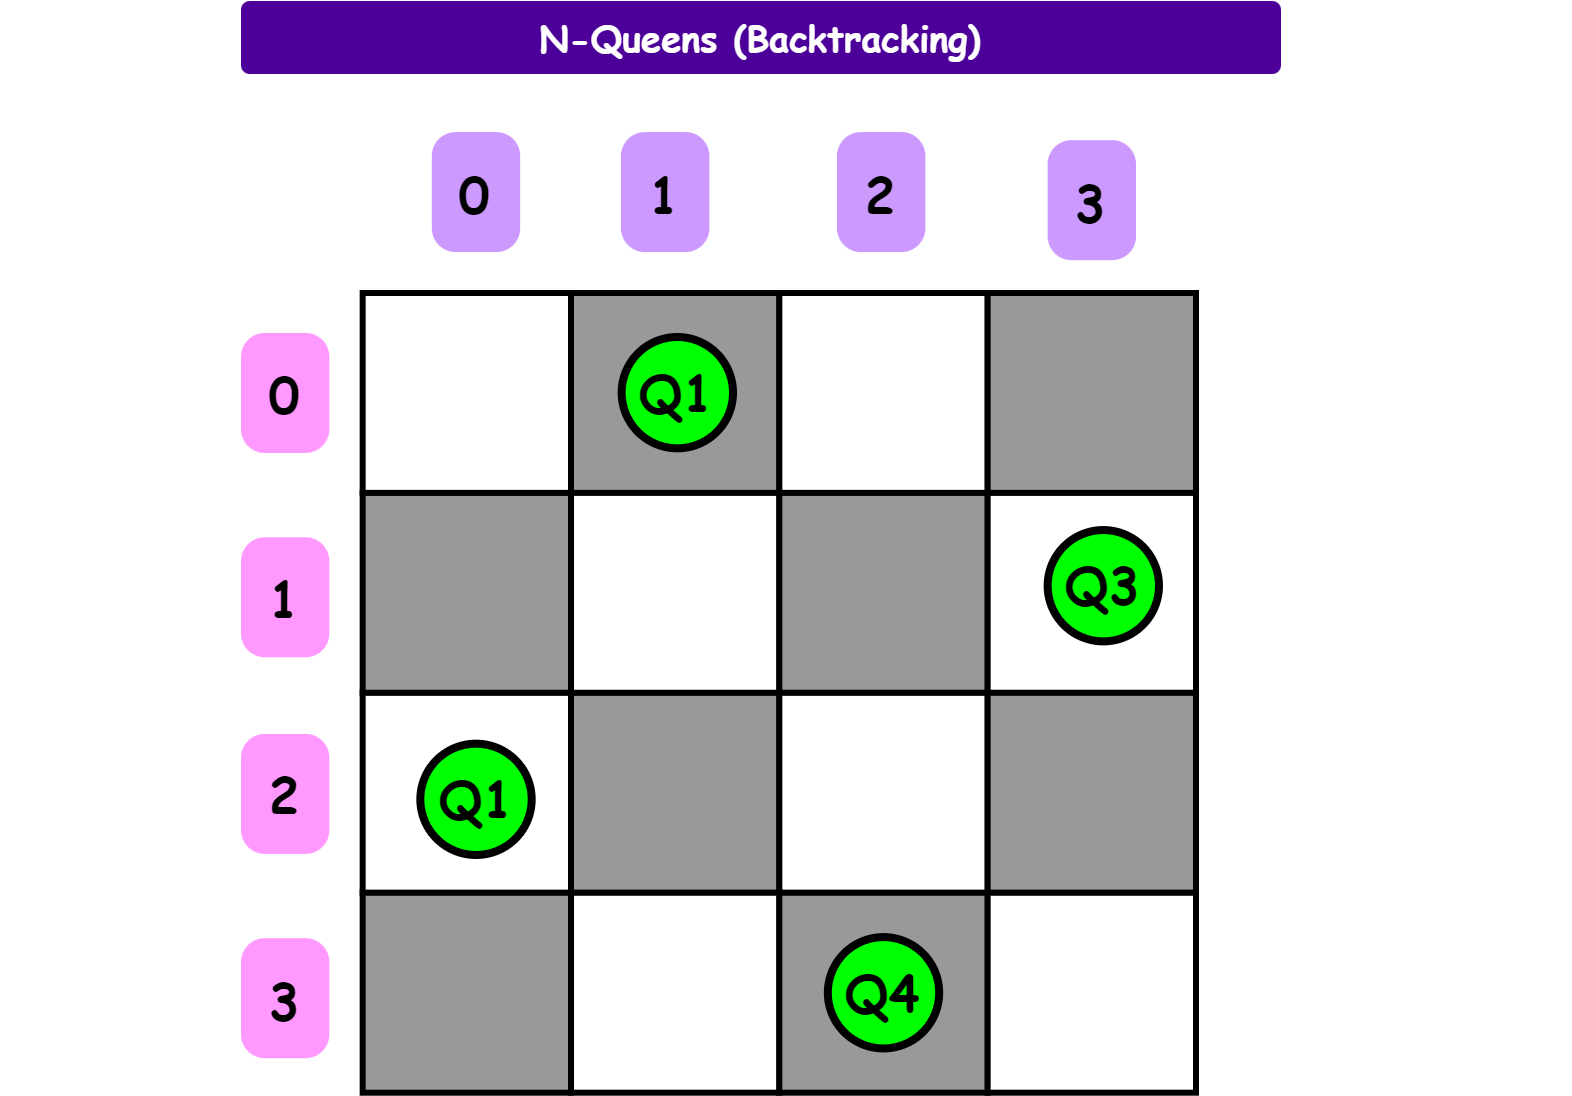

---



### **Problem Definition**
Place 4 queens on a 4×4 chessboard such that no two queens threaten each other (no two queens in the same row, column, or diagonal).

### **State Representation**
**State**: A list of column positions for queens placed so far, where the index represents the row.
- Example: [2, 0, 3, 1] means:
  - Queen in row 0, column 2
  - Queen in row 1, column 0  
  - Queen in row 2, column 3
  - Queen in row 3, column 1

**Initial State**: [] (empty list - no queens placed)

**Goal State**: A list of length 4 where no two queens threaten each other


---

In [ ]:

# "Check if placing a queen at (row, col) is safe
def is_safe(state, col):
    row = len(state)
    for i, queen_col in enumerate(state):
        # Check column and diagonal conflicts
        if queen_col == col or abs(i - row) == abs(queen_col - col):
            return False
    return True

# Return valid column positions for the next row
def applicable_actions(state):
    if len(state) >= 4:
        return []
    return [col for col in range(4) if is_safe(state, col)]

def backtrack(state_list, step_num=[1]):
    
    print(f"Call {step_num[0]}: StateList = {state_list}")
    step_num[0] += 1
    
    # Step 1: State ← First(StateList)  
    state = state_list[0]
    print(f"  Step 1: State = {state}")
    
    # Step 2: If Goal(State) Then return SUCCEED
    if len(state) == 4:
        print(f"  Step 2: GOAL! Returning SUCCEED")
        return ["SUCCEED"]
    
    # Step 3: If Deadend(State) Then return FAIL
    actions = applicable_actions(state)
    if not actions:
        print(f"  Step 3: DEADEND! No actions available")
        return "FAIL"
    
    # Step 4: If State ∈ RestOf(StateList) Then return FAIL
    if state in state_list[1:]:
        print(f"  Step 4: CYCLE detected!")
        return "FAIL"
    
    # Step 5: Length check (using reasonable bound)
    if len(state_list) >= 20:
        print(f"  Step 5: BOUND exceeded!")
        return "FAIL"
    
    # Step 6: Actions ← ApplicableActions(State)
    print(f"  Step 6: Actions = {actions}")
    
    # Step 7: Loop
    for act in actions:
        print(f"  Step 7.2: Trying action {act}")
        
        # Step 7.3: NextState ← Act(State)
        next_state = state + [act]
        
        # Step 7.4: NextStateList ← NextState, StateList  
        next_state_list = [next_state] + state_list
        
        # Step 7.5: Path ← Backtrack(NextStateList)
        print(f"  Step 7.5: Recursive call with {next_state}")
        path = backtrack(next_state_list, step_num)
        
        # Step 7.6: If Path=FAIL Then go Loop
        if path == "FAIL":
            print(f"  Step 7.6: Action {act} failed, trying next")
            continue
            
        # Step 7.7: Return Act, Path
        print(f"  Step 7.7: Success! Returning [{act}] + {path}")
        return [act] + path
    
    # Step 7.1: If null(Actions) Then return FAIL
    print(f"  Step 7.1: All actions failed")
    return "FAIL"

def print_board(solution):
    """Print the solution board"""
    print(f"\nSolution: {solution}")
    for row in range(4):
        line = ""
        for col in range(4):
            line += "Q " if solution[row] == col else ". "
        print(line)

def solve_4queens():
    """Solve 4-Queens problem"""
    print("4-Queens Backtracking Algorithm")
    print("=" * 40)
    
    # Start with empty state
    result = backtrack([[]])
    
    if result == "FAIL":
        print("\nNo solution found!")
    else:
        solution = result[:-1]  # Remove "SUCCEED"
        print(f"\nFinal result: {solution}")
        print_board(solution)

# Run the solver
if __name__ == "__main__":
    solve_4queens()